In [92]:
# import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# from pandas import datetime
import math
# from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from DataProcessing import Data


In [93]:
d = Data()
chosen_index = 'ORCL'
d.preprocess(chosen_index)
df = d.get_data(chosen_index)
df.columns

Processing ORCL.csv
Saved ORCL data at data/processed/ORCL.csv


Index(['Date', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MFI', 'EMA', 'SO',
       'MACD', 'Next Day Price'],
      dtype='object')

# Normalize

In [94]:
df['Volume'] = df['Volume']/1000000
print(df)

            Date        High         Low       Close   Volume        RSI  \
0     2019-04-01   50.355732   49.618592   50.291233  15.1917  90.173784   
1     2019-04-02   50.217512   49.646231   49.895016  10.8121  69.020600   
2     2019-04-03   50.116159   49.627807   49.812092  12.8534  63.074971   
3     2019-04-04   49.895021   49.213167   49.590950   9.9788  60.543492   
4     2019-04-05   49.931875   49.517238   49.692307  10.0163  57.949793   
...          ...         ...         ...         ...      ...        ...   
1240  2024-03-05  113.199997  110.370003  110.940002   8.2420  38.523535   
1241  2024-03-06  113.050003  110.669998  112.269997   6.7064  37.832018   
1242  2024-03-07  114.800003  112.290001  114.540001   7.6701  39.435919   
1243  2024-03-08  114.330002  111.540001  112.419998   8.3041  39.481832   
1244  2024-03-11  114.750000  111.180000  114.129997  19.7974  40.970435   

            MFI         EMA         SO       MACD  Next Day Price  
0     48.929325   4

In [95]:
X = df[df.columns[1:10]]
Y = df[['Next Day Price']]
X.head() 
# Y.head()

,High,Low,Close,Volume,RSI,MFI,EMA,SO,MACD
0,50.355732,49.618592,50.291233,15.1917,90.173784,48.929325,49.156719,98.082201,49.074574
1,50.217512,49.646231,49.895016,10.8121,69.020600,42.759702,49.255159,86.301211,49.034730
2,50.116159,49.627807,49.812092,12.8534,63.074971,44.719640,49.329416,83.835581,49.053513
3,49.895021,49.213167,49.590950,9.9788,60.543492,51.845073,49.364287,65.702342,49.057315
4,49.931875,49.517238,49.692307,10.0163,57.949793,48.880394,49.408023,70.247807,49.110874


In [96]:
TRAIN_PERCENT = 0.8
train_size = int(TRAIN_PERCENT*len(X))

X_train = X[0:train_size]
Y_train = Y[0:train_size]
X_test = X[train_size:len(X)]
Y_test = Y[train_size:len(Y)]

In [97]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)


X_train (996, 9)
y_train (996, 1)
X_test (249, 9)
y_test (249, 1)


In [98]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 100, validation_split=0.05)

Epoch 1/100


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4353.2231 - val_loss: 7400.5161
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4389.5332 - val_loss: 7335.7944
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4324.6675 - val_loss: 7201.0332
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4236.1323 - val_loss: 6945.5376
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3930.5159 - val_loss: 6506.4849
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3716.4353 - val_loss: 5818.2876
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3222.1599 - val_loss: 4844.0996
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2535.8035 - val_loss: 3612.3137
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1796.6368 - val_loss: 2259.7412
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 984.7133 - val_loss: 1049.4655
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 385.9182 - val_loss: 297.6294
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━

In [99]:
Y_predict = classifier.predict(X_test)
print(Y_predict[:10])


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
[[80.57172 ]
 [80.96178 ]
 [82.08095 ]
 [82.867256]
 [83.44012 ]
 [83.84706 ]
 [83.64728 ]
 [83.135056]
 [84.27772 ]
 [84.85383 ]]


In [100]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error


r2 = r2_score(Y_test, Y_predict)
print(f'R-squared: {r2}')

rmse = root_mean_squared_error(Y_test, Y_predict)
print(f'Root Mean Squared Error: {rmse}')

mape = mean_absolute_percentage_error(Y_test, Y_predict)
print(f'Mean Absolute Percentage Error: {mape}')

Train Score: 3.70 MSE (1.92 RMSE)
Test Score: 21.91 MSE (4.68 RMSE)
R-squared: 0.7435006980202344
Root Mean Squared Error: 4.648876027533299
Mean Absolute Percentage Error: 0.03763065023120185


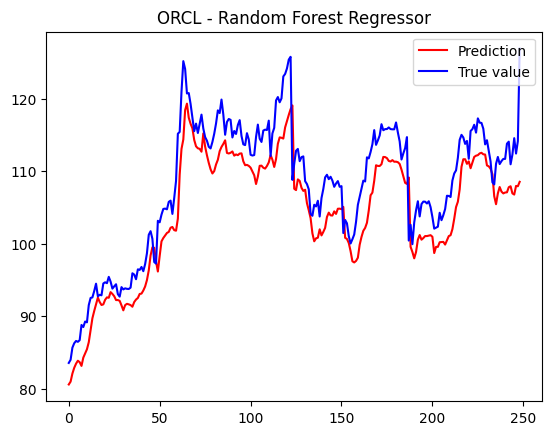

In [101]:
import numpy as np

shift_amount = Y_predict.shape[0] - Y_test.shape[0]
Y_test_shifted = np.roll(Y_test, -shift_amount)

plt.plot(Y_predict,color='red',label='Prediction')
plt.plot(Y_test_shifted,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - Random Forest Regressor')
plt.show()